In [2]:
%matplotlib inline

In [1]:
import pandas as pd #Manejo de datos tabulados
import numpy as np #Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt #Graficos de datos
import seaborn as sns #Graficos estadisticos
import pandas_profiling as ppr  #
from fitter import fitter #Ajustes de distribuciones de probs
import geopandas as gpd #Pandas para datos geograficos
import datetime #Tipo de dato para fechas y horas

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
##Leemos los datos seleccionados
df_main=pd.read_csv('..\DATA\Churn_Modelling.csv')

## Analisis Exploratorio de Datos
### EDA, por sus siglas en inglés, es el proceso de limpieza y descubrimiento de insights a través de la revisión detallada de un conjunto de datos.
#### Pasos de preparación:
##### Seleccionar las variables a analizar (que sean relevantes para el estudio)
##### Verificar la integridad de las variables (si están limpias o qué debemos hacer para limpiarlas o si no se pueden usar)
##### Plantearse preguntas de exploración

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Validar integridad del identificador único
len(df_main['CustomerId'].unique()),df_main.shape[0]

(10000, 10000)

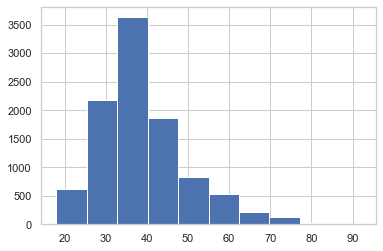

In [8]:
df_main['Age'].hist()
plt.show()

In [9]:
df_main['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [14]:
rangos_edad = [18,24,30,36,42,48,54,60,66,72,78,92]
edad_bins = pd.cut(df_main['Age'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()
edad_bins_count

(30, 36]    2641
(36, 42]    2497
(24, 30]    1511
(42, 48]    1352
(48, 54]     660
(18, 24]     435
(54, 60]     418
(60, 66]     235
(66, 72]     144
(72, 78]      66
(78, 92]      19
Name: Age, dtype: int64

<AxesSubplot:>

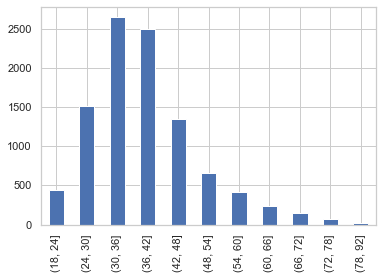

In [15]:
edad_bins_count.sort_index().plot(kind='bar')

In [16]:
df_main['edad_bins']=edad_bins

In [10]:
profile = ppr.ProfileReport(df_main, title='Pandas Profiling Report', minimal=True)
profile.to_file('..\DATA\'Churn_Modelling.csv')

Render HTML: 100%|██████████| 1/1 [00:05<00:00,  5.63s/it]
c:\Users\abiga\Documents\AnalyticsMiproyecto\Pythonanalytics_env\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.46it/s]
